In [1]:
import tensorflow as tf
from model import *
from data_pipeline import *
from constants import *
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
model = tf.keras.models.load_model(MODEL_CHECKPOINT_DIR+'resnet50v2_retrain_8layers_lr_1e-3')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2048)              23564800  
_________________________________________________________________
last_dense (Dense)           (None, 3)                 6147      
_________________________________________________________________
activation (Activation)      (None, 3)                 0         
Total params: 23,570,947
Trainable params: 23,525,507
Non-trainable params: 45,440
_________________________________________________________________


In [4]:
train_generator, valid_generator = get_data_generators(DATA_DIR, IMAGE_SIZE, BATCH_SIZE)

Found 551 validated image filenames belonging to 3 classes.
Found 1288 validated image filenames belonging to 3 classes.


In [5]:
loss, acc = model.evaluate(valid_generator, verbose=2)

18/18 - 2s - loss: 0.5266 - accuracy: 0.8040


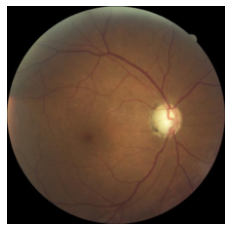

True label: glaucoma
Predicted label: glaucoma


In [6]:
def get_class_string_from_index(index):
   for class_string, class_index in valid_generator.class_indices.items():
      if class_index == index:
         return class_string

x, y = next(valid_generator)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
plt.imshow(image)
plt.axis('off')
plt.show()


prediction_scores = model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + get_class_string_from_index(true_index))
print("Predicted label: " + get_class_string_from_index(predicted_index))

In [7]:
preds = model.predict(valid_generator)
preds = [np.argmax(pred) for pred in preds]

<AxesSubplot:>

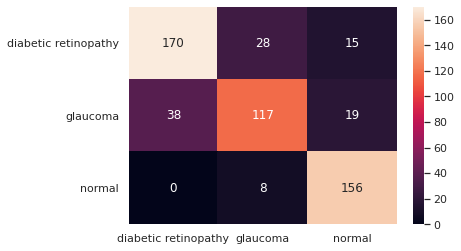

In [8]:
cm = confusion_matrix(valid_generator.labels, preds)
classes = valid_generator.class_indices.keys()
sns.set()
sns.heatmap(cm, annot=True, xticklabels = classes ,yticklabels = classes,fmt='g')